Predict employbility and job placement using candidates past academic parameters 

Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_import = pd.read_csv('/content/creditcard.csv')

In [3]:
data_import

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237692,149352.0,-1.795969,1.171110,0.106506,-1.193818,0.248561,2.418984,-0.755729,1.774687,0.336809,...,0.319463,1.165454,-0.179041,-2.348549,-0.166829,0.827846,0.386992,0.141743,34.99,0.0
237693,149352.0,1.971373,0.563968,-1.052447,3.549534,1.014790,0.643579,0.172618,-0.063923,-0.982008,...,0.256246,0.872402,-0.067301,0.068836,0.352030,0.252338,-0.029553,-0.049665,10.59,0.0
237694,149352.0,2.087787,0.239585,-1.743892,0.369307,0.595164,-0.764449,0.260053,-0.292133,0.329707,...,-0.361893,-0.878506,0.307024,0.410547,-0.197957,0.177523,-0.055255,-0.029636,1.29,0.0
237695,149353.0,-7.629245,6.859757,-4.889222,-2.993155,-0.461859,-1.253808,0.666932,0.963512,5.100547,...,-0.770141,0.420174,0.086960,0.125147,1.043297,-0.071343,0.785015,-0.697357,1.46,0.0


In [9]:
sampled_data = data_import.sample(30000)
unused = sampled_data[['Time', 'Amount']]
y = sampled_data['Class']
X = sampled_data.iloc[:, 1:-2]
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
64953,1.047414,-0.419754,0.711499,-0.068019,-0.622231,0.368119,-0.631122,0.382042,0.348197,-0.071167,...,-0.515864,-0.107497,-0.036677,-0.233126,0.166207,-0.269289,-0.219092,0.862439,-0.045471,0.003176
171442,-0.071971,0.682967,-0.660620,-0.160860,0.174836,-0.197354,0.116728,0.676248,0.529505,-1.258414,...,0.486872,-0.398844,-0.256675,-0.704219,0.279682,0.614707,-1.021975,0.062744,-0.037979,0.052972
154122,1.905845,-0.805877,-1.230331,-0.550027,1.483766,4.075624,-1.588652,1.050619,2.502774,-0.387281,...,-0.649181,-0.078501,-0.100290,-0.067675,0.344416,0.670604,-0.593723,0.460317,-0.024910,-0.045436
132304,0.102438,0.479447,2.236533,0.892186,-0.611709,0.375193,-0.316422,-0.026558,0.245094,0.281932,...,0.750885,0.226849,0.353747,1.352669,-0.008763,0.174466,-1.097522,0.675722,-0.111440,-0.097270
6492,-0.819444,0.471884,2.642984,0.956567,-0.159034,0.392587,0.149845,0.280723,2.028725,-1.460232,...,-0.707969,-0.243554,-0.427616,-0.668412,0.057858,0.307727,-0.176563,-0.750389,0.140007,0.132371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74760,-0.775545,0.285993,2.695495,0.368023,-1.143906,0.003082,0.169655,0.155496,-0.063405,-0.586204,...,0.283376,0.356472,0.343063,0.784753,-0.028826,0.433902,0.050027,0.707502,0.028367,0.093358
163778,2.040211,-0.146975,-2.955934,-0.578356,2.609358,3.142642,-0.416883,0.784393,0.359902,-0.351075,...,-0.140099,-0.120714,-0.352334,-0.996937,0.363485,0.604827,-0.264560,0.219671,-0.039209,-0.042787
195801,0.091019,1.602637,-1.740682,0.201533,0.573124,-1.795759,0.609790,0.177215,-0.010572,-1.624124,...,-0.547268,-0.109804,0.169908,0.614540,-0.125271,-0.195039,-0.229950,-0.131594,0.195428,0.052253
74305,1.312386,0.653368,-0.772995,0.755198,0.366244,-1.169847,0.409476,-0.294106,-0.153917,-0.715956,...,-0.179192,-0.045236,-0.185128,-0.466311,-0.146696,-0.222764,0.641990,0.399379,-0.030434,0.038114


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X10D = pca.fit_transform(X)
X10D = pd.DataFrame(X10D)
X10D


,0,1,2,3,4,5,6,7,8,9
0,-1.018355,0.517308,-0.254321,-0.167380,0.699836,0.391406,0.084324,-0.618626,0.222158,-0.245976
1,-0.085436,-0.623038,0.645318,-0.110407,-0.221277,-0.244428,-0.342865,-0.483633,0.374153,0.939873
2,-1.630599,1.128300,1.711228,-0.227987,-2.377224,3.557653,-0.329324,-1.700926,3.597185,-0.037142
3,-0.436059,-0.552699,-1.890678,0.776606,0.819708,0.476793,0.081895,-0.156324,-0.054918,-0.500823
4,0.370031,-0.662617,-2.403438,1.001196,0.623750,0.621338,-0.150643,-0.229449,3.281668,1.607745
...,...,...,...,...,...,...,...,...,...,...
29995,0.306966,-0.607835,-2.385759,0.089251,1.387947,0.201165,-0.072297,-0.178657,-0.210918,0.501986
29996,-1.716262,0.785611,2.932799,-0.076384,-3.520962,2.353511,-0.590749,-1.062732,0.026680,0.061830
29997,-0.264989,-1.383812,1.609913,0.379200,-0.768667,-2.080686,0.046319,0.047746,-0.393416,1.253164
29998,-1.304125,-0.252835,0.951132,0.898056,-0.318302,-1.298369,0.233655,0.399439,-0.420184,0.549855


In [11]:
Xinverse = pca.inverse_transform(X10D)
Xinverse

array([[ 1.00957763e+00, -4.31577879e-01,  7.04203849e-01, ...,
         7.15328513e-03,  1.39433610e-02, -2.33933203e-02],
       [-6.43589540e-02,  6.04017421e-01, -5.18592566e-01, ...,
         5.94438412e-04, -1.28715479e-02, -1.25560249e-02],
       [ 1.91457418e+00, -7.58966552e-01, -1.28856446e+00, ...,
         3.91377087e-02,  1.01413269e-02, -7.08215211e-03],
       ...,
       [ 1.02982006e-01,  1.59334387e+00, -1.66425299e+00, ...,
        -9.67741638e-03, -7.29384678e-03, -2.34753777e-02],
       [ 1.30422620e+00,  6.46639546e-01, -7.78980165e-01, ...,
        -5.98292732e-03,  6.32468340e-03, -1.56973347e-02],
       [ 1.54241218e-01,  1.16418272e+00, -2.33743813e-01, ...,
         1.47475087e-02,  6.46696665e-03,  1.44407608e-03]])

In [12]:
pca = PCA()
XD = pca.fit(X)
cumsum =np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)
d

21

In [13]:
cumsum

array([0.12929659, 0.22275006, 0.2957208 , 0.35846914, 0.41832653,
       0.47315531, 0.52209876, 0.56812813, 0.60892511, 0.64774354,
       0.68278625, 0.71566454, 0.74754864, 0.77799579, 0.80478788,
       0.82925061, 0.85254859, 0.87526404, 0.89702776, 0.91770191,
       0.93544493, 0.95127793, 0.96436961, 0.97576793, 0.98385934,
       0.9910632 , 0.99621827, 1.        ])

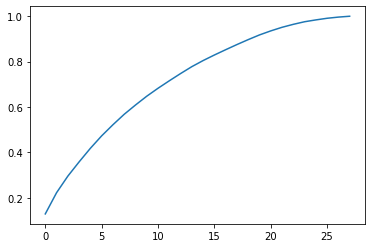

In [14]:
plt.plot(cumsum)

Grid Search

In [18]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline
#from sklearn.decomposition import KernelPCA

#clf = Pipeline([
    
 #                     ('kpca', KernelPCA(n_components =2)),
  #                    ('log_reg', LogisticRegression())

#])


#param_grid = [{
    
#                  "kpca__gamma":np.linspace(0.03, 0.05, 10)
 #                 "kpca__kernel":["rbf", "sigmoid"]
#}]

#grid_search = GridsearchCV(clf, param_grid, cv=3)
#grid_search.fit(X, y)

SyntaxError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

clf = Pipeline([
								("kpca", KernelPCA(n_components=2)),
								("log_reg", LogisticRegression())
])

param_grid = [{
							"kpca__gamma":np.linspace(0.03, 0.05, 10),
							"kpca__kernel":["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)